In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
import os
os.environ["PATH"]+=os.pathsep+"/home/pirl/anaconda3/lib/python3.7/site-packages/sphinx/templates/graphviz"

In [3]:
df_raw=pd.read_csv("data/BigData/체질검사.csv",engine="python")
matplotlib.rc("font",family="NanumGothic")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [6]:
svm_uncustomized=SVR()
svm_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.181
Score on test set:-0.036


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
v_feature_name=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712


In [9]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (176, 13)
train data Y size : (76, 13)


In [10]:
svm_scaled=SVR()
svm_scaled.fit(df_scaled_train_x,df_train_y)
print("Score on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Score on training set:0.578
Score on test set:0.499


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
train_score=[]; test_score=[]
para_C=[10**c for c in range(-2,3)]

for v_C in para_C:
    svm=SVR(C=v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))
    
df_score_C=pd.DataFrame()
df_score_C["C"]=para_C
df_score_C["TrainScore"]=train_score
df_score_C["TestScore"]=test_score

df_score_C.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainScore,TestScore
0,0.01,0.018,-0.025
1,0.10,0.151,0.110
2,1.00,0.578,0.499
3,10.00,0.846,0.538
4,100.00,0.953,0.446


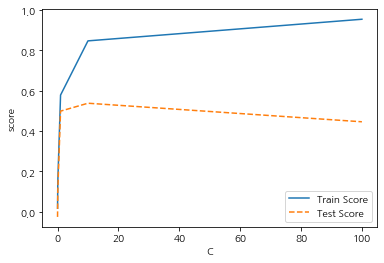

In [13]:
plt.plot(para_C,train_score,linestyle="-",label="Train Score")
plt.plot(para_C,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("C")
plt.legend()

In [14]:
train_score=[];test_score=[]
para_gamma=[10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm=SVR(gamma=v_gamma,C=10)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))
    
df_score_gamma=pd.DataFrame()
df_score_gamma["gamma"]=para_gamma
df_score_gamma["TrainScore"]=train_score
df_score_gamma["TestScore"]=test_score

df_score_gamma.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.764,0.594
1,0.10,0.868,0.537
2,1.00,0.927,0.164
3,10.00,0.912,-0.046
4,100.00,0.912,-0.046


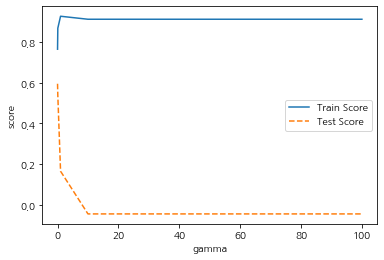

In [15]:
plt.plot(para_gamma,train_score,linestyle="-",label="Train Score")
plt.plot(para_gamma,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("gamma")
plt.legend()

In [16]:
train_score=[]; test_score=[]
para_epsilon=[eps/20 for eps in range(1,21)]

for v_epsilon in para_epsilon:
    svm=SVR(epsilon=v_epsilon,C=10,gamma=0.01)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))
    
df_score_epsilon=pd.DataFrame()
df_score_epsilon["epsilon"]=para_epsilon
df_score_epsilon["TrainScore"]=train_score
df_score_epsilon["TestScore"]=test_score

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.764,0.595
1,0.10,0.764,0.594
2,0.15,0.764,0.593
3,0.20,0.764,0.592
4,0.25,0.763,0.591
5,0.30,0.762,0.590
6,0.35,0.762,0.589
7,0.40,0.762,0.588
8,0.45,0.761,0.587
9,0.50,0.762,0.585


In [17]:
# train_score=[];test_score=[]
# para_gamma=[10**gamma for gamma in range(1,9)]

# for v_gamma in para_gamma:
#     svm=SVR(gamma=v_gamma,C=10)
#     svm.fit(df_scaled_train_x,df_train_y)
#     train_score.append(svm.score(df_scaled_train_x,df_train_y))
#     test_score.append(svm.score(df_scaled_test_x,df_test_y))
    
# df_score_gamma=pd.DataFrame()
# df_score_gamma["gamma"]=para_gamma
# df_score_gamma["TrainScore"]=train_score
# df_score_gamma["TestScore"]=test_score

# df_score_gamma.round(3)

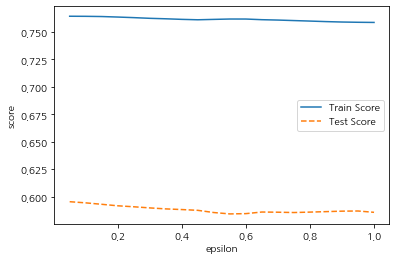

In [18]:
plt.plot(para_epsilon,train_score,linestyle="-",label="Train Score")
plt.plot(para_epsilon,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("epsilon")
plt.legend()

In [19]:
svr_final=SVR(C=10,gamma=0.01,epsilon=0.5)
svr_final.fit(df_scaled_train_x,df_train_y)

print("Score on training set:{:.3f}".format(svr_final.score(df_scaled_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(svr_final.score(df_scaled_test_x,df_test_y)))

Score on training set:0.762
Score on test set:0.585


In [20]:
# estimator=SVR()
# param_grid={"C":para_C,"gamma":para_gamma,"epsilon":para_epsilon}
# grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
# grid_dt.fit(df_train_x,df_train_y)

# print("best estimator model: \n{}".format(grid_dt.best_estimator_))
# print("nbest parameter: \n{}".format(grid_dt.best_params_))
# print("nbest score: \n{}".format(grid_dt.best_score_.round(3)))

# 모델 평가

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [23]:
import os
os.environ["PATH"]+=os.pathsep+"/home/pirl/anaconda3/lib/python3.7/site-packages/sphinx/templates/graphviz"

In [24]:
df_raw=pd.read_csv("data/BigData/체질검사.csv",engine="python")
matplotlib.rc("font",family="NanumGothic")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [25]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)

In [26]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [27]:
lr_model=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_raw)
lr_result=lr_model.fit()
print(lr_result.summary())

dt_model=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

rf_model=RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=6,min_samples_split=14,max_depth=4)
rf_model.fit(df_train_x,df_train_y)

gb_model=GradientBoostingRegressor(random_state=1234,n_estimators=30,min_samples_leaf=11,min_samples_split=22,max_depth=4,learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           4.38e-68
Time:                        14:10:03   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
models=["회귀분석","의사결정나무","랜덤포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

### 회귀분석

In [29]:
lr_y_pred=lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

### 의사결정나무

In [30]:
dt_y_pred=dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

### 랜덤포레스트

In [31]:
rf_y_pred=rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

### 그래디언트 부스팅

In [32]:
gb_y_pred=gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

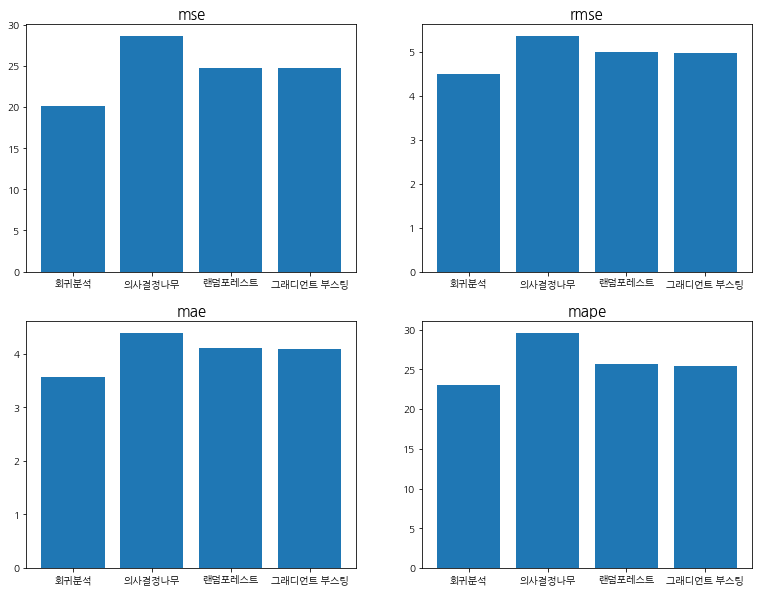

In [33]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)